In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
df = pd.read_csv('US_Regional_Sales_Data.csv')  # Replace 'your_dataset.csv' with the actual file path

In [3]:
df.head(10)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
5,SO - 000106,Online,WARE-PUJ1005,31/12/17,31/5/18,8/6/18,13/6/18,USD,12,21,285,1,5,0.050,446.56,"1,038.50"
6,SO - 000107,In-Store,WARE-XYS1001,31/12/17,31/5/18,8/6/18,14/6/18,USD,10,14,6,5,4,0.150,536.67,"1,192.60"
7,SO - 000108,In-Store,WARE-PUJ1005,10/4/18,31/5/18,26/6/18,1/7/18,USD,6,9,280,46,5,0.050,"1,525.19","1,815.70"
8,SO - 000109,In-Store,WARE-PUJ1005,31/12/17,1/6/18,16/6/18,21/6/18,USD,4,9,299,47,4,0.300,"2,211.20","3,879.30"
9,SO - 000110,In-Store,WARE-UHY1004,31/12/17,1/6/18,29/6/18,1/7/18,USD,10,33,261,13,8,0.050,"1,212.97","1,956.40"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [5]:
# Convert date columns to datetime
date_columns = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True, format='%d/%m/%y')

# Feature engineering
df['DeliveryTime'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

In [6]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,DeliveryTime
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10",19
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60",32
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,781.22,"1,775.50",31
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90",7
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40",26


In [7]:
unique_sales_channels = df['Sales Channel'].unique()
print(unique_sales_channels)

['In-Store' 'Online' 'Distributor' 'Wholesale']


In [8]:
def categ_check(val):
    if val =='Distributor' :
        return 0
    elif val == 'In-Store':
        return 1
    elif val == 'Online':
        return 2
    elif val == 'Wholesale':
        return 3


df['Sales Channel'] = df['Sales Channel'].apply(categ_check)


In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'WarehouseCode' column modified
# (from the code you provided)

# Define a function to map warehouse codes to numerical values
def categ_check_ware(val):
    if val == ' WARE-MKL1006':
        return 0
    elif val == 'WARE-NBV1002':
        return 1
    elif val == 'WARE-NMK1003':
        return 2
    elif val == 'WARE-PUJ1005':
        return 3
    elif val == 'WARE-UHY1004':
        return 4
    else:
        return 5

# Apply the function to the 'WarehouseCode' column of the DataFrame 'df'
df['WarehouseCode'] = df['WarehouseCode'].apply(categ_check_ware)




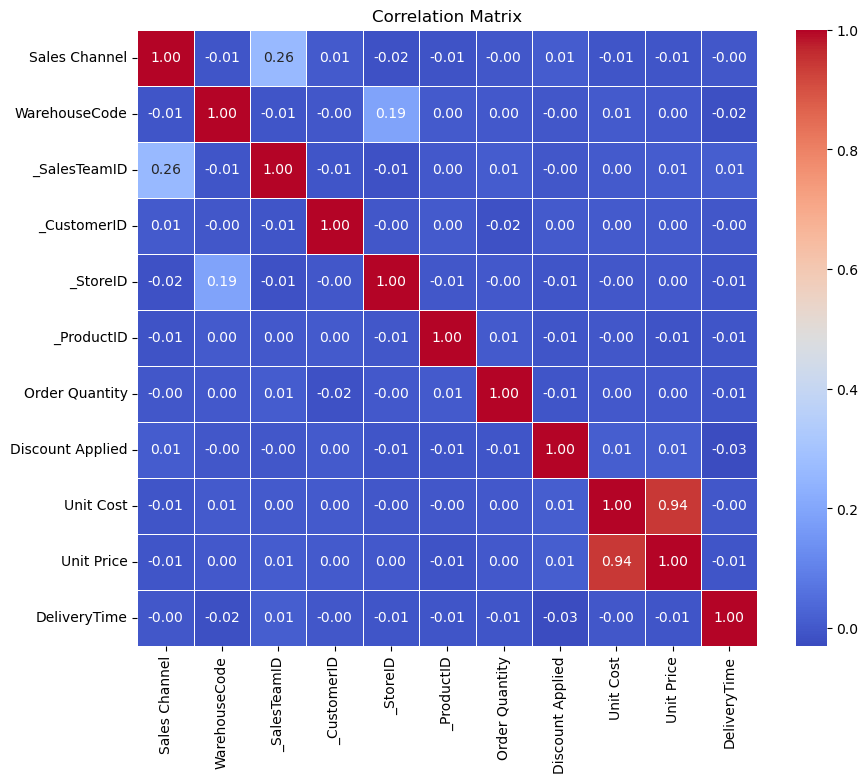

In [10]:
# Specify the index to check and replace
index_to_replace = 1  # Replace the comma at index 1 (zero-based index)

# Replace the comma at the specified index, only if it is a comma
df['Unit Cost'] = df['Unit Cost'].apply(lambda x: x[:index_to_replace] 
                    + x[index_to_replace:].replace(',', '') if x[index_to_replace] == ',' else x)
df['Unit Price'] = df['Unit Price'].apply(lambda x: x[:index_to_replace] 
                    + x[index_to_replace:].replace(',', '') if x[index_to_replace] == ',' else x)

# Convert 'Unit Cost' and 'Unit Price' to numeric
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# If not, replace it with the actual name of your DataFrame
# For example: df = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

# Calculate 'Profit' column
df['Profit'] = (df['Unit Price'] * (1 - df['Discount Applied']) - df['Unit Cost']) * df['Order Quantity']


# Calculate 'Profit' column
df['Profit'] = (df['Unit Price'] * (1 - df['Discount Applied']) - df['Unit Cost']) * df['Order Quantity']

# Calculate 'Profit' column
df['Profit'] = (df['Unit Price'] * (1 - df['Discount Applied']) - df['Unit Cost']) * df['Order Quantity']


In [11]:
# Select relevant features
features = ['Discount Applied','Sales Channel', 'DeliveryTime', 'Order Quantity', '_ProductID', '_CustomerID', '_SalesTeamID', '_StoreID','WarehouseCode','Profit']


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Unit Price'], test_size=0.2, random_state=0)


In [13]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
"""new_data = [[0,3],[1,55]]
# predict labels of the new data points
rf_model.predict(new_data)"""


'new_data = [[0,3],[1,55]]\n# predict labels of the new data points\nrf_model.predict(new_data)'

In [15]:
print ("Training accuracy of the model is: ", rf_model.score(X_train, y_train))
print ("Testing accuracy of the model is: ", rf_model.score(X_test, y_test))


Training accuracy of the model is:  0.9419205823177371
Testing accuracy of the model is:  0.5940447471445126


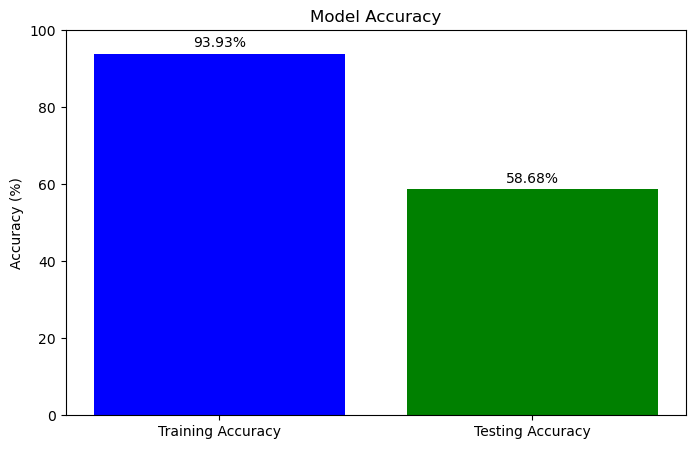

In [16]:
import matplotlib.pyplot as plt

# Assuming you have the following accuracy values
training_accuracy = 93.93429887158716
testing_accuracy = 58.6805817048648

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
plt.ylim(0, 100)  # Set the y-axis limit to be between 0 and 100 for percentage values
features.remove('Profit')
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')

# Add percentage labels
for i, value in enumerate([training_accuracy, testing_accuracy]):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()



In [17]:
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

# Boosting model - XGBoostRegressor
xgb_model = xgb.XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate accuracy score
r2_xgb = xgb_model.score(X_test, y_test)
print(f'XGBoostRegressor accuracy: {r2_xgb}')

# Another Boosting model - GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Calculate accuracy score
r2_gb = gb_model.score(X_test, y_test)
print(f'GradientBoostingRegressor accuracy: {r2_gb}')

XGBoostRegressor accuracy: 0.571830797446832
GradientBoostingRegressor accuracy: 0.5575953666691311


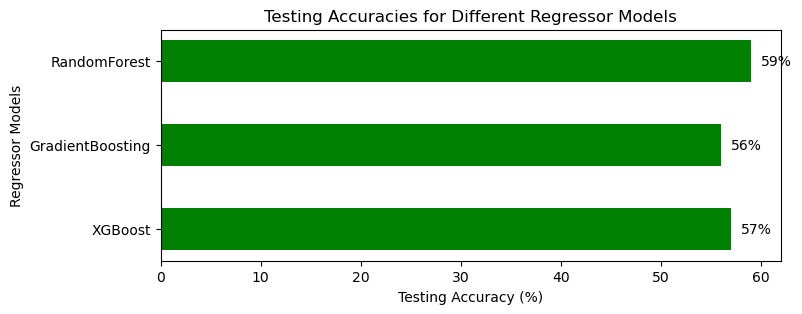

In [18]:
import matplotlib.pyplot as plt

# Model names and corresponding testing accuracies
models = ['XGBoost', 'GradientBoosting', 'RandomForest']
accuracies = [57, 56, 59]

# Create a horizontal bar chart with decreased width
plt.figure(figsize=(8, 3))  # Adjust the figure size as needed
plt.barh(models, accuracies, color='green', height=0.5)  # Adjust the height parameter

# Adding text labels for accuracy values
for model, acc in zip(models, accuracies):
    plt.text(acc + 1, models.index(model), f'{acc}%', va='center')

plt.title('Testing Accuracies for Different Models')
plt.xlabel('Testing Accuracy (%)')
plt.ylabel('RModels')

plt.show()


In [19]:
# Assuming you've already loaded and preprocessed the data as shown above

# Group by sales channel and calculate average unit price
channel_prices = df.groupby('Sales Channel')['Profit'].mean().sort_values(ascending=False)
print(channel_prices)

Sales Channel
0    2827.561736
3    2769.030840
1    2667.632879
2    2543.016785
Name: Profit, dtype: float64


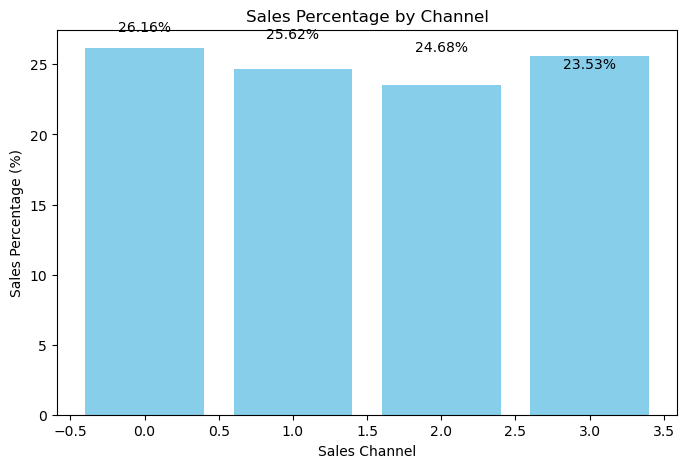

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the following sales data
sales_data = {
    'Sales Channel': [0, 3, 1, 2],
    'Sales Amount': [2827.561736, 2769.030840, 2667.632879, 2543.016785]
}

# Calculate the total sales amount
total_sales = sum(sales_data['Sales Amount'])

# Calculate the percentage of sales amount
sales_percentage = [(amount / total_sales) * 100 for amount in sales_data['Sales Amount']]

# Sorting the data by Sales Amount in descending order for better visualization
sorted_sales_data = sorted(zip(sales_data['Sales Channel'], sales_percentage), key=lambda x: x[1], reverse=True)
sales_channel, sales_percentage = zip(*sorted_sales_data)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(sales_channel, sales_percentage, color='skyblue')
plt.xlabel('Sales Channel')
plt.ylabel('Sales Percentage (%)')
plt.title('Sales Percentage by Channel')

# Add percentage labels
for i, value in enumerate(sales_percentage):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()



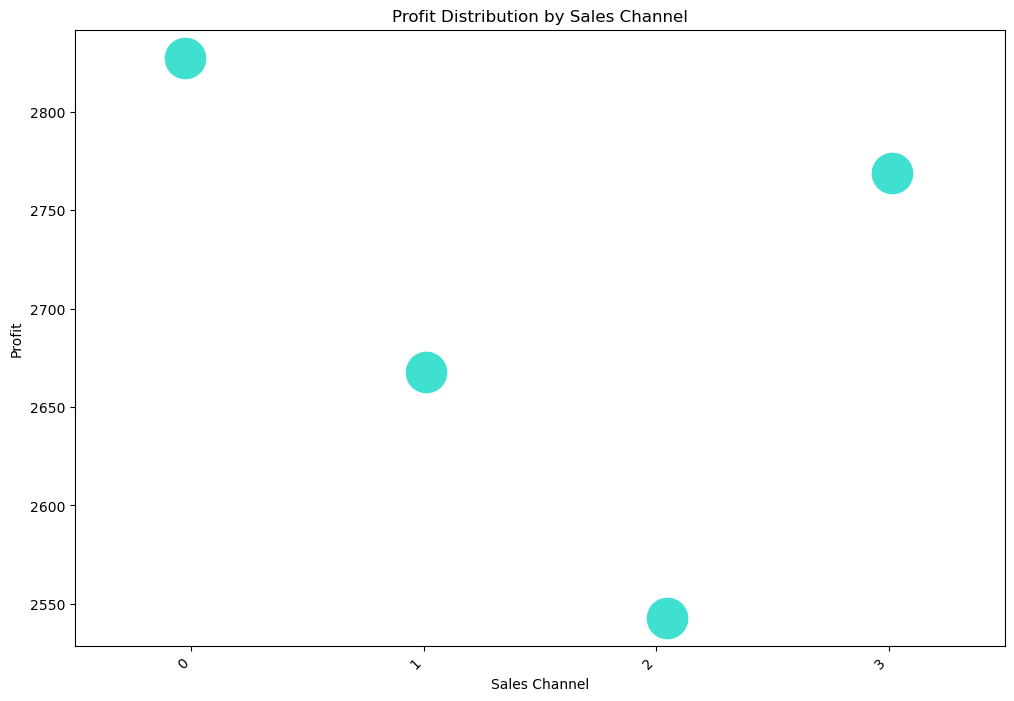

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming channel_prices is your Series with average profit by sales channel
plt.figure(figsize=(12, 8))
sns.stripplot(x=channel_prices.index, y=channel_prices.values, color='turquoise', jitter=True, size=30)
plt.title('Profit Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your DataFrame is named 'df'
# For simplicity, we'll select a few columns for clustering
#selected_columns = ['_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied']

# Group by customer and calculate total spent and average discount
customer_data = df.groupby('_CustomerID').agg({'Order Quantity': 'mean', 'Discount Applied': 'mean', 'Unit Cost': 'mean', 'Unit Price': 'mean'})


# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data)

# Choose the number of clusters (k)
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
segmentation_data = kmeans.fit_predict(scaled_data)

# Display the cluster assignments for each customer ID
print(df['_CustomerID'].unique()," ",segmentation_data)

[15 20 16 48 49 21 14  9 33 36 17 32 11 10 30  5 23 46 40 19 22 29 35 42
  2 28 34 26 24 18  3 13  4 25  8 47  6 38  1  7 27 44 12 50 43 37 41 31
 45 39]   [1 1 1 0 0 2 1 0 1 2 0 2 2 0 2 2 2 2 1 1 2 2 0 0 0 0 1 2 2 1 0 0 2 2 1 2 0
 0 1 2 2 1 2 0 2 0 1 1 2 2]


In [23]:
# Analyze the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back to the original data space
centroid_df = pd.DataFrame(centroids, columns=customer_data.columns)

# Display the features contributing the most to each cluster
for i in range(k):
    print(f"\nFeatures contributing the most to Cluster {i + 1}:\n{centroid_df.iloc[i].nlargest(2)}")



Features contributing the most to Cluster 1:
Unit Price    2272.633454
Unit Cost     1414.822287
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2146.584541
Unit Cost     1350.857723
Name: 1, dtype: float64

Features contributing the most to Cluster 3:
Unit Price    2383.364826
Unit Cost     1496.948973
Name: 2, dtype: float64


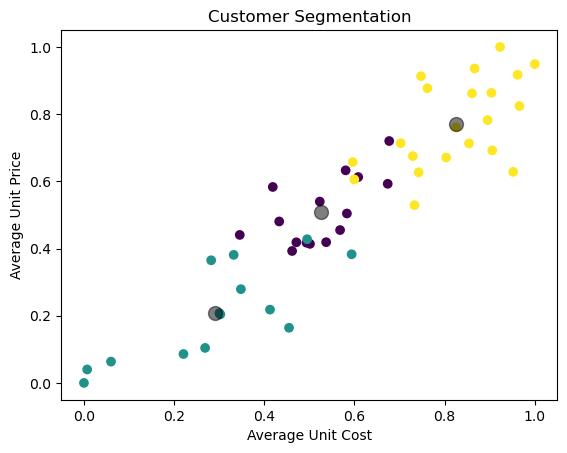

In [24]:
# Visualize the clusters (using the first two features for simplicity)
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=segmentation_data, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=100, alpha=0.5);
plt.xlabel('Average Unit Cost')
plt.ylabel('Average Unit Price')
plt.title('Customer Segmentation')
plt.show()

C:\Users\tskap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Features contributing the most to Cluster 1:
Unit Price    2283.846935
Unit Cost     1431.405417
Name: 0, dtype: float64


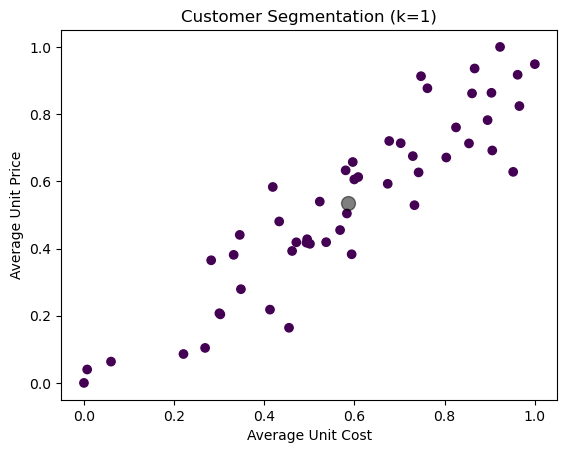


Features contributing the most to Cluster 1:
Unit Price    2197.946301
Unit Cost     1376.633827
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2376.905955
Unit Cost     1490.741307
Name: 1, dtype: float64


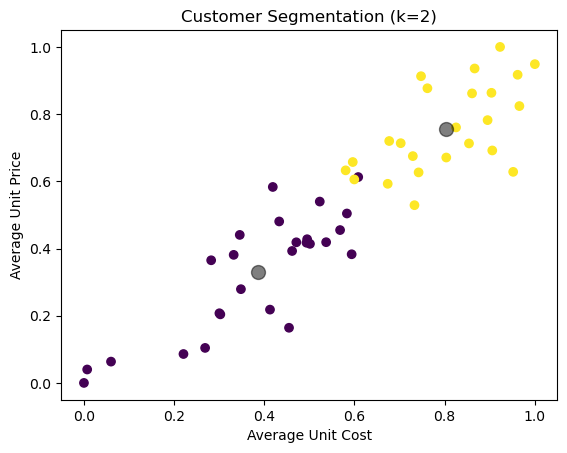


Features contributing the most to Cluster 1:
Unit Price    2272.633454
Unit Cost     1414.822287
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2146.584541
Unit Cost     1350.857723
Name: 1, dtype: float64

Features contributing the most to Cluster 3:
Unit Price    2383.364826
Unit Cost     1496.948973
Name: 2, dtype: float64


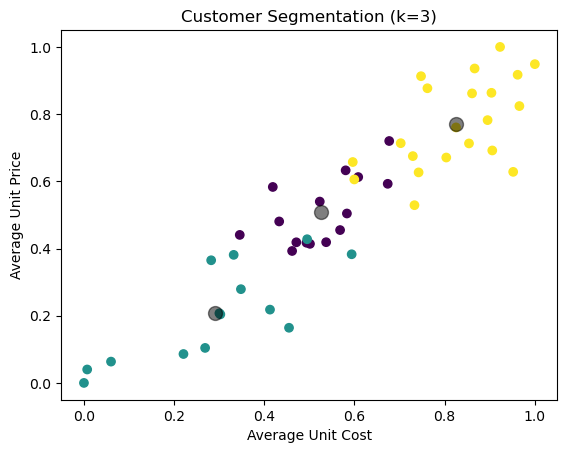


Features contributing the most to Cluster 1:
Unit Price    2132.794929
Unit Cost     1339.316232
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2389.188913
Unit Cost     1501.196082
Name: 1, dtype: float64

Features contributing the most to Cluster 3:
Unit Price    2302.218222
Unit Cost     1438.704176
Name: 2, dtype: float64

Features contributing the most to Cluster 4:
Unit Price    2241.553790
Unit Cost     1399.596676
Name: 3, dtype: float64


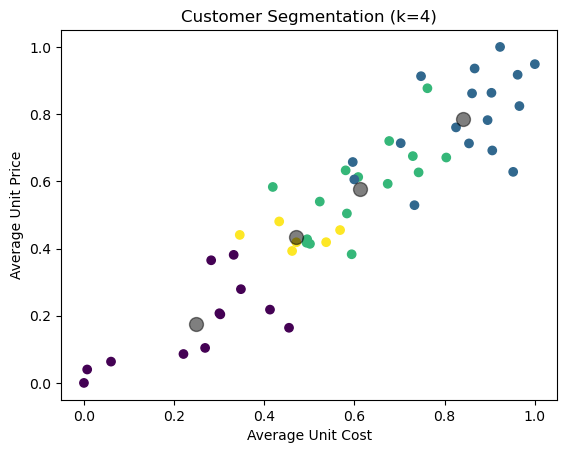


Features contributing the most to Cluster 1:
Unit Price    2078.611858
Unit Cost     1290.849053
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2377.419176
Unit Cost     1497.188269
Name: 1, dtype: float64

Features contributing the most to Cluster 3:
Unit Price    2370.775029
Unit Cost     1477.704781
Name: 2, dtype: float64

Features contributing the most to Cluster 4:
Unit Price    2241.553790
Unit Cost     1399.596676
Name: 3, dtype: float64

Features contributing the most to Cluster 5:
Unit Price    2204.412185
Unit Cost     1386.260417
Name: 4, dtype: float64


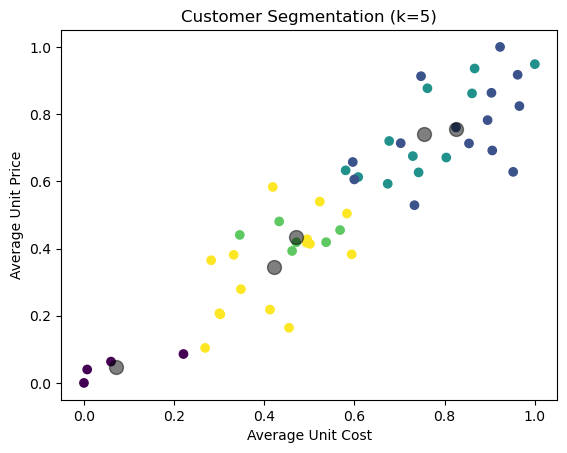


Features contributing the most to Cluster 1:
Unit Price    2121.309184
Unit Cost     1319.482649
Name: 0, dtype: float64

Features contributing the most to Cluster 2:
Unit Price    2380.357589
Unit Cost     1497.820261
Name: 1, dtype: float64

Features contributing the most to Cluster 3:
Unit Price    2245.290477
Unit Cost     1408.599092
Name: 2, dtype: float64

Features contributing the most to Cluster 4:
Unit Price    2400.480647
Unit Cost     1499.576725
Name: 3, dtype: float64

Features contributing the most to Cluster 5:
Unit Price    2291.553347
Unit Cost     1426.633651
Name: 4, dtype: float64

Features contributing the most to Cluster 6:
Unit Price    2180.895832
Unit Cost     1380.167283
Name: 5, dtype: float64


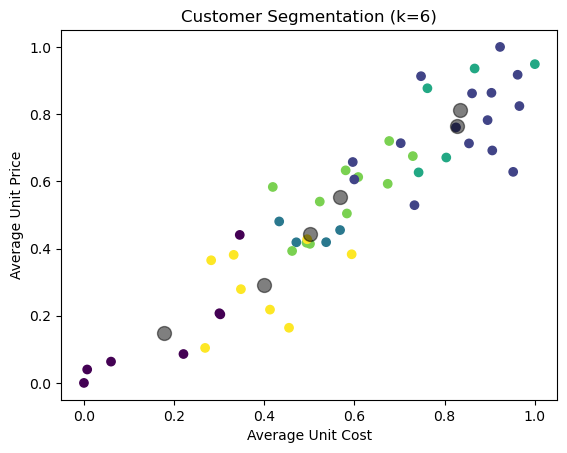

In [25]:
def perform_clustering_and_visualization(df, k):
    # Group by customer and calculate total spent and average discount
    customer_data = df.groupby('_CustomerID').agg({'Order Quantity': 'mean', 'Discount Applied': 'mean', 'Unit Cost': 'mean', 'Unit Price': 'mean'})

    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(customer_data)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    segmentation_data = kmeans.fit_predict(scaled_data)

    # Analyze the cluster centroids
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back to the original data space
    centroid_df = pd.DataFrame(centroids, columns=customer_data.columns)

    # Display the features contributing the most to each cluster
    for i in range(k):
        print(f"\nFeatures contributing the most to Cluster {i + 1}:\n{centroid_df.iloc[i].nlargest(2)}")

    # Visualize the clusters
    plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=segmentation_data, cmap='viridis' )
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 2], centers[:, 3], c='black', s=100, alpha=0.5);
    plt.xlabel('Average Unit Cost')
    plt.ylabel('Average Unit Price')
    plt.title(f'Customer Segmentation (k={k})')
    plt.show()

# Perform clustering and visualization for k=1, 2, 3, 4, 5, 6
for k_value in range(1, 7):
    perform_clustering_and_visualization(df, k_value)

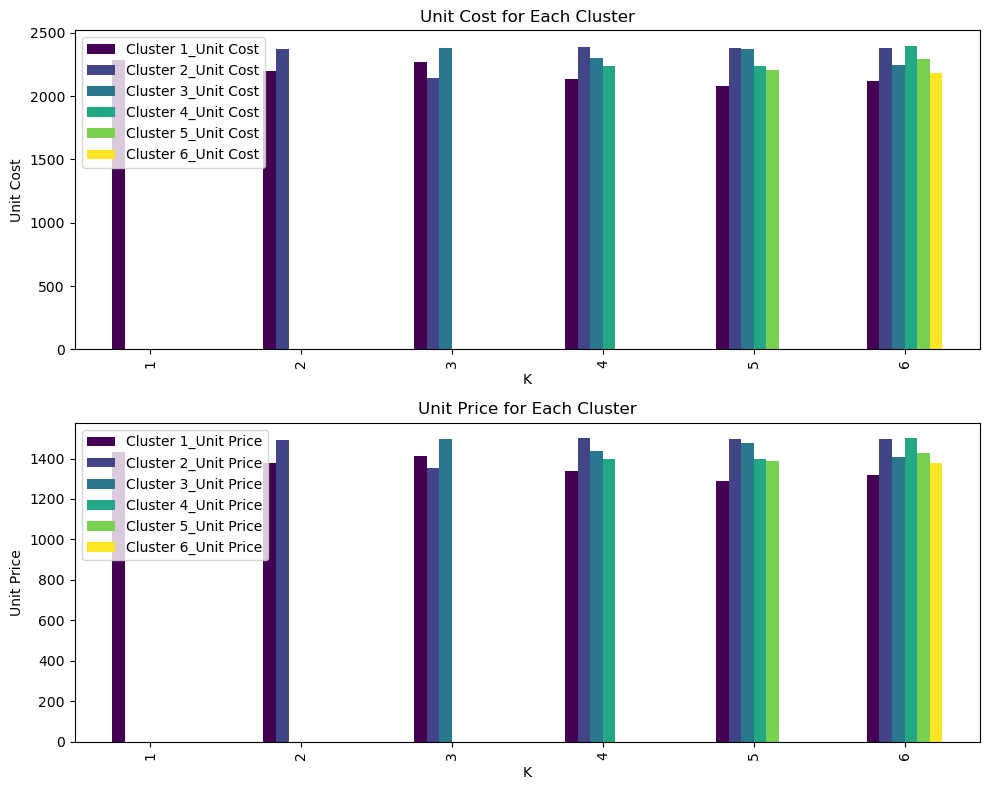

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the following data
data = {
    'K': ['1', '2', '3', '4', '5', '6'],
    'Cluster 1_Unit Cost': [2283.846935, 2197.946301, 2272.633454, 2132.794929, 2078.611858, 2121.309184],
    'Cluster 1_Unit Price': [1431.405417, 1376.633827, 1414.822287, 1339.316232, 1290.849053, 1319.482649],
    'Cluster 2_Unit Cost': [None, 2376.905955, 2146.584541, 2389.188913, 2377.419176, 2380.357589],
    'Cluster 2_Unit Price': [None, 1490.741307, 1350.857723, 1501.196082, 1497.188269, 1497.820261],
    'Cluster 3_Unit Cost': [None, None, 2383.364826, 2302.218222, 2370.775029, 2245.290477],
    'Cluster 3_Unit Price': [None, None, 1496.948973, 1438.704176, 1477.704781, 1408.599092],
    'Cluster 4_Unit Cost': [None, None, None, 2241.55379, 2241.55379, 2400.480647],
    'Cluster 4_Unit Price': [None, None, None, 1399.596676, 1399.596676, 1499.576725],
    'Cluster 5_Unit Cost': [None, None, None, None, 2204.412185, 2291.553347],
    'Cluster 5_Unit Price': [None, None, None, None, 1386.260417, 1426.633651],
    'Cluster 6_Unit Cost': [None, None, None, None, None, 2180.895832],
    'Cluster 6_Unit Price': [None, None, None, None, None, 1380.167283],
}

df = pd.DataFrame(data)

# Plotting bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart for 'Unit Cost'
df.plot(x='K', y=[f'Cluster {i}_Unit Cost' for i in range(1, 7)], kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Unit Cost for Each Cluster')
axes[0].set_ylabel('Unit Cost')

# Bar chart for 'Unit Price'
df.plot(x='K', y=[f'Cluster {i}_Unit Price' for i in range(1, 7)], kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_title('Unit Price for Each Cluster')
axes[1].set_ylabel('Unit Price')

plt.tight_layout()
plt.show()
